# SMS Spam Classification
In this project, we will create an email spam detection system. Our goal is to train a machine learning model that can classify emails as either spam or non-spam (ham). This will help us filter out unwanted and potentially harmful emails from our inbox. We'll follow the standard data science workflow, including data loading, preprocessing, feature extraction, model training, evaluation, and prediction. Let's begin building our email spam detector!

Dataset link:https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

**Intially import all the requried dependencies**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from collections import Counter

Dataset link : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

**Data Collection and Pre-processing**

In [ ]:
# loading the data from csv file to pandas Dataframe
raw_data = pd.read_csv('/content/spam.csv',encoding='latin-1')

In [ ]:
print(raw_data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#replace null values with null string
sms_data = raw_data.where((pd.notnull(raw_data)),'')

In [ ]:
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [ ]:
# Dropping unnecessary columns from the dataframe
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
sms_data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
sms_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# Rename the columns "v1 and "v2" to new names

new_column_names = {"v1":"Category","v2":"Message"}
sms_data.rename(columns = new_column_names,inplace = True)

In [ ]:
sms_data[sms_data.duplicated()]

,Category,Message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [ ]:
# Drop duplicated values
sms_data = sms_data.drop_duplicates()
sms_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   Message   5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [ ]:
sms_data.describe()

,Category,Message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [ ]:
sms_data.shape

(5169, 2)

In [ ]:
sms_data['Category'].value_counts()

ham     4516
spam     653
Name: Category, dtype: int64

**Data Visualisation**

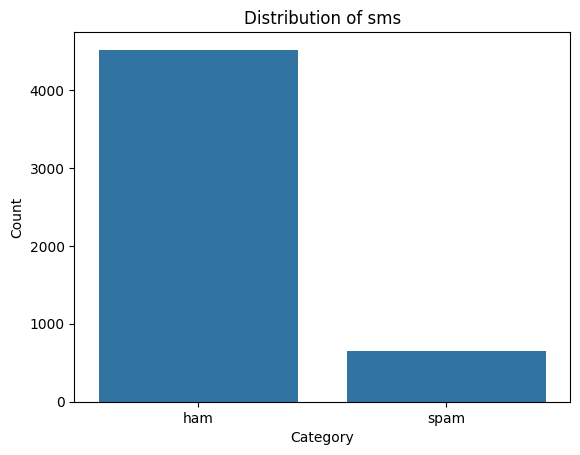

In [ ]:
sns.countplot(data=sms_data,x='Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of sms')
plt.show()

**Data Preprocessing**

In [ ]:
#Convert the 'Category' column values to numerical representations(0 for "spam", 1 for "ham")
sms_data.loc[sms_data["Category"] == "spam", "Category"] = 0
sms_data.loc[sms_data["Category"] == "ham", "Category"] = 1
sms_data.head()

<ipython-input-17-e141b4d1d55f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_data.loc[sms_data["Category"] == "spam", "Category"] = 0
<ipython-input-17-e141b4d1d55f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_data.loc[sms_data["Category"] == "ham", "Category"] = 1


,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Separate feature (X) and target (Y) data
X = sms_data['Message']
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [ ]:
Y = sms_data['Category']
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5169, dtype: object

**Splitting the data into training data & test data**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5169,)
(4135,)
(1034,)


**Feature Extraction**

In [ ]:
#Transform text data into feature vectors that can be used as input to logistic regression
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [ ]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [ ]:
#convert Y_train ,Y_test values as integers
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [ ]:
print(X_train)

4443                       COME BACK TO TAMPA FFFFUUUUUUU
982     Congrats! 2 mobile 3G Videophones R yours. cal...
3822    Please protect yourself from e-threats. SIB ne...
3924       As if i wasn't having enough trouble sleeping.
4927    Just hopeing that wasnÛ÷t too pissed up to re...
                              ...                        
806      sure, but make sure he knows we ain't smokin yet
990                                          26th OF JULY
1723    Hi Jon, Pete here, Ive bin 2 Spain recently & ...
3519    No it will reach by 9 only. She telling she wi...
1745    IåÕm cool ta luv but v.tired 2 cause i have be...
Name: Message, Length: 4135, dtype: object


In [ ]:
print(X_train_features)

  (0, 2697)	0.7205755344386542
  (0, 6409)	0.5950532917415522
  (0, 1825)	0.35592482233751443
  (1, 5438)	0.27399320458839144
  (1, 4583)	0.27399320458839144
  (1, 4438)	0.22516921191243092
  (1, 5036)	0.27399320458839144
  (1, 2274)	0.27399320458839144
  (1, 2920)	0.23390504161994488
  (1, 3610)	0.27399320458839144
  (1, 4984)	0.19732502227978832
  (1, 4180)	0.23390504161994488
  (1, 7137)	0.24133495616477563
  (1, 6940)	0.27399320458839144
  (1, 203)	0.27399320458839144
  (1, 6941)	0.27399320458839144
  (1, 453)	0.25698446420786897
  (1, 4333)	0.15929709793058355
  (1, 1885)	0.22516921191243092
  (2, 953)	0.26160275768603725
  (2, 4856)	0.26160275768603725
  (2, 5786)	0.26160275768603725
  (2, 2459)	0.22436535516409714
  (2, 4960)	0.26160275768603725
  (2, 5976)	0.1902832473629628
  :	:
  (4132, 6862)	0.11085392369947865
  (4132, 5612)	0.14854309693836068
  (4132, 3865)	0.16898098428277844
  (4133, 6457)	0.6154177820886059
  (4133, 5320)	0.5530764956488926
  (4133, 2311)	0.4238274869

**Model Training**

In [ ]:
#Create a logistic regression model and train it on the training data
model1 = LogisticRegression()
model1.fit(X_train_features,Y_train)

LogisticRegression()

In [ ]:
#Create a Multinomial naive bayes model and train it on the training data
model2 = MultinomialNB()
model2.fit(X_train_features,Y_train)

MultinomialNB()

In [ ]:
#Create a Gaussian naive bayes model and train it on the training data
model3 = GaussianNB()
X_train_features_dense = X_train_features.toarray()
model3.fit(X_train_features_dense,Y_train)

GaussianNB()

**Model Evaluation and Prediction**

1)Prediction using Logistic Regression

In [ ]:
prediction_on_training_data = model1.predict(X_train_features)
accuracy_model1 = accuracy_score(Y_train,prediction_on_training_data)

In [ ]:
print('Accuracy on training data using LogisticRegression: ',accuracy_model1)

Accuracy on training data using LogisticRegression:  0.962273276904474


In [ ]:
prediction_on_test_data = model1.predict(X_test_features)
accuracy_test_model1 = accuracy_score(Y_test,prediction_on_test_data)

In [ ]:
print('Accuracy on test data using LogisticRegression: ',accuracy_test_model1)

Accuracy on test data using LogisticRegression:  0.960348162475822


2)Prediction using Multinomial naive bayes

In [ ]:
prediction_on_training_data = model2.predict(X_train_features)
accuracy_model2 = accuracy_score(Y_train,prediction_on_training_data)

In [ ]:
print('Accuracy on training data using MultinomialNB: ',accuracy_model2)

Accuracy on training data using MultinomialNB:  0.9789600967351875


In [ ]:
prediction_on_test_data = model1.predict(X_test_features)
accuracy_test_model2 = accuracy_score(Y_test,prediction_on_test_data)

In [ ]:
print('Accuracy on test data using MultinomialNB: ',accuracy_test_model2)

Accuracy on test data using MultinomialNB:  0.960348162475822


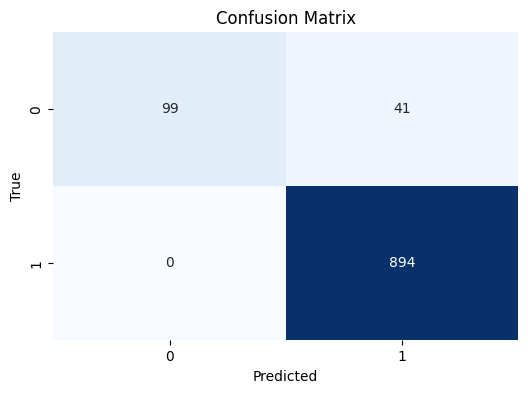

In [ ]:
# Data visualization - Confusion Matrix

cm = confusion_matrix(Y_test, prediction_on_test_data)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

3)Prediction using Gaussian naive bayes

In [ ]:
prediction_on_training_data = model3.predict(X_train_features_dense)
accuracy_model3 = accuracy_score(Y_train,prediction_on_training_data)

In [ ]:
print('Accuracy on training data using Gaussian: ',accuracy_model3)

Accuracy on training data using Gaussian:  0.9446191051995163


In [ ]:
X_test_features_dense = X_test_features.toarray()
prediction_on_test_data = model3.predict(X_test_features_dense)
accuracy_test_model3 = accuracy_score(Y_test,prediction_on_test_data)

In [ ]:
print('Accuracy on test data using GaussianNB: ',accuracy_test_model3)

Accuracy on test data using GaussianNB:  0.8800773694390716


In [ ]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model2.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham sms')

else:
  print('Spam sms')

[1]
Ham sms


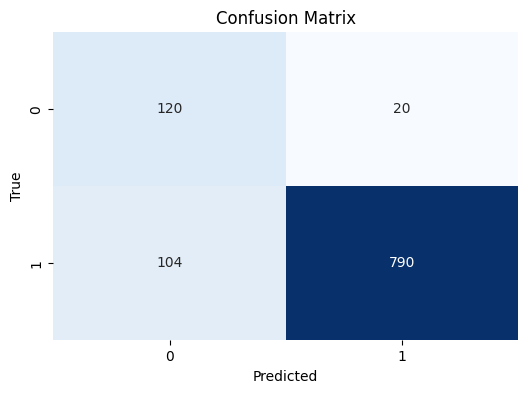

In [ ]:
# Data visualization - Confusion Matrix

cm = confusion_matrix(Y_test, prediction_on_test_data)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

There are several possible reasons why you might be getting less accuracy with the GaussianNB model compared to the MultinomialNB model:

•	Different assumptions: The GaussianNB model assumes that the features are normally distributed, while the MultinomialNB model assumes that the features follow a multinomial distribution. If the features in your data do not follow a normal distribution, then the GaussianNB model may not be able to capture the relationships between the features and the target variable as well as the MultinomialNB model.

•	Different parameter estimation methods: The GaussianNB model estimates the mean and variance of each feature for each class, while the MultinomialNB model estimates the probability of each feature value for each class. These different parameter estimation methods can lead to different predictions.

•	Data sparsity: The GaussianNB model can be more sensitive to data sparsity than the MultinomialNB model. If your data contains a lot of missing values or zeros, then the GaussianNB model may not be able to learn the relationships between the features and the target variable as well as the MultinomialNB model.

Here are some things you can try to improve the accuracy of the GaussianNB model:

•	Check the distribution of your features. If the features are not normally distributed, then you may want to try using a different model, such as the MultinomialNB model.

•	Increase the amount of training data. The more training data you have, the better the GaussianNB model will be able to learn the relationships between the features and the target variable.

•	Use feature engineering to create new features that are more informative or less sparse. This can help the GaussianNB model to learn more effectively.

Ultimately, the best way to determine which model is best for your data is to experiment with different models and compare their performance.
